In [11]:
import os
os.chdir("../")

In [12]:
import requests
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import mplfinance as mpf
from ichimoku import IchimokuCloud

In [13]:
def get_crypto_symbol_candles(symbol: str, interval: str, limit: int = 1000) -> DataFrame:
    url = "https://testnet.binancefuture.com/fapi/v1/klines"
    data = {}
    data["symbol"] = symbol
    data["interval"] = interval
    data["limit"] = limit
    response = requests.get(url, params=data)

    candles = []
    for candle in response.json():
        candles.append(
            {
                "timestamp": candle[0],
                "open": candle[1],
                "high": candle[2],
                "low": candle[3],
                "close": candle[4],
                "volume": candle[5],
            }
        )

    candle_df = pd.DataFrame(candles)

    return candle_df

In [14]:
def get_forex_symbol_candles(
    symbol: str, interval: str, start_date: str, end_date: str
):
    data: DataFrame = yf.download(
        symbol, interval=interval, start=start_date, end=end_date, group_by="ticker"
    )
    data = data.dropna()
    # data.columns = data.columns.str.lower()
    data = data.reset_index()

    return data

In [15]:
symbol = "ETHUSDT"
interval = "1h"
# candle_df = get_crypto_symbol_candles(symbol, interval)
candle_df = get_forex_symbol_candles("EURUSD=X", interval, "2023-10-01", "2024-01-11")
ichimoku = IchimokuCloud(candle_df)
ichimoku_df = ichimoku.get_ichimoku_df(shift=True)
ichimoku_df

[*********************100%%**********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,2023-10-02 00:00:00+01:00,1.056189,1.056747,1.056078,1.056636,NaN,NaN,NaN,NaN,1.048218
1,2023-10-02 01:00:00+01:00,1.056636,1.057083,1.056524,1.056636,NaN,NaN,NaN,NaN,1.047559
2,2023-10-02 02:00:00+01:00,1.056747,1.057306,1.056747,1.057083,NaN,NaN,NaN,NaN,1.047449
3,2023-10-02 03:00:00+01:00,1.057194,1.057418,1.056971,1.057083,NaN,NaN,NaN,NaN,1.046901
4,2023-10-02 04:00:00+01:00,1.057083,1.057306,1.057083,1.057306,NaN,NaN,NaN,NaN,1.047120
...,...,...,...,...,...,...,...,...,...,...
1730,2023-12-13 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095085,1.094761,NaN
1731,2023-12-13 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095206,1.094761,NaN
1732,2023-12-13 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095355,1.094460,NaN
1733,2023-12-13 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095415,1.094520,NaN


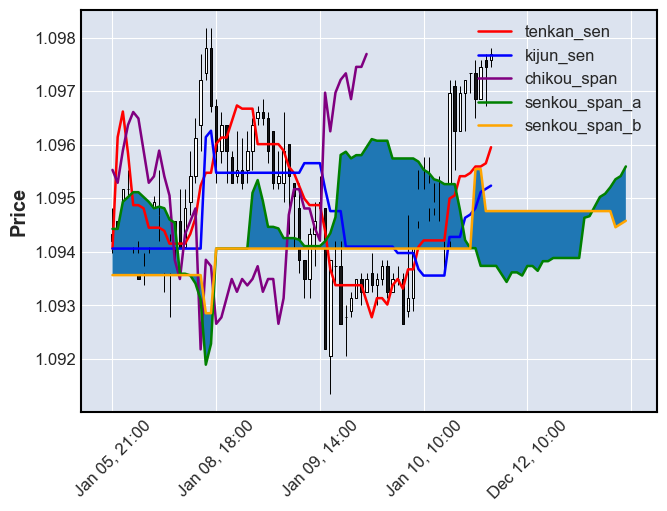

In [16]:
ichimoku.kumo_cloud_plot(ichimoku_df.tail(100))

In [17]:
ichimoku_df

,Datetime,Open,High,Low,Close,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,2023-10-02 00:00:00+01:00,1.056189,1.056747,1.056078,1.056636,NaN,NaN,NaN,NaN,1.048218
1,2023-10-02 01:00:00+01:00,1.056636,1.057083,1.056524,1.056636,NaN,NaN,NaN,NaN,1.047559
2,2023-10-02 02:00:00+01:00,1.056747,1.057306,1.056747,1.057083,NaN,NaN,NaN,NaN,1.047449
3,2023-10-02 03:00:00+01:00,1.057194,1.057418,1.056971,1.057083,NaN,NaN,NaN,NaN,1.046901
4,2023-10-02 04:00:00+01:00,1.057083,1.057306,1.057083,1.057306,NaN,NaN,NaN,NaN,1.047120
...,...,...,...,...,...,...,...,...,...,...
1730,2023-12-13 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095085,1.094761,NaN
1731,2023-12-13 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095206,1.094761,NaN
1732,2023-12-13 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095355,1.094460,NaN
1733,2023-12-13 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095415,1.094520,NaN


In [18]:
price_cloud_cross_signal = ichimoku.price_senkou_span_cross(ichimoku_df)
kijun_sen_direction_signal = ichimoku.kijun_sen_direction(ichimoku_df)

In [19]:
ichimoku_df

,Datetime,Open,High,Low,Close,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,2023-10-02 00:00:00+01:00,1.056189,1.056747,1.056078,1.056636,NaN,NaN,NaN,NaN,1.048218
1,2023-10-02 01:00:00+01:00,1.056636,1.057083,1.056524,1.056636,NaN,NaN,NaN,NaN,1.047559
2,2023-10-02 02:00:00+01:00,1.056747,1.057306,1.056747,1.057083,NaN,NaN,NaN,NaN,1.047449
3,2023-10-02 03:00:00+01:00,1.057194,1.057418,1.056971,1.057083,NaN,NaN,NaN,NaN,1.046901
4,2023-10-02 04:00:00+01:00,1.057083,1.057306,1.057083,1.057306,NaN,NaN,NaN,NaN,1.047120
...,...,...,...,...,...,...,...,...,...,...
1730,2023-12-13 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095085,1.094761,NaN
1731,2023-12-13 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095206,1.094761,NaN
1732,2023-12-13 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095355,1.094460,NaN
1733,2023-12-13 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.095415,1.094520,NaN


In [20]:
mandatory_signals = np.sum([price_cloud_cross_signal, kijun_sen_direction_signal])
if mandatory_signals == 2 or mandatory_signals == -2:
    (
        senkou_span_cloud_signal,
        senkou_span_cloud_grade,
    ) = ichimoku.senkou_span_cloud_color(ichimoku_df)
    price_kijun_cross_signal, price_kijun_cross_grade = ichimoku.price_kijun_sen_cross(
        ichimoku_df
    )
    (
        tenken_kijun_cross_signal,
        tenken_kijun_cross_grade,
    ) = ichimoku.tenkan_sen_kijun_sen_cross(ichimoku_df)
    (
        price_chikou_cross_signal,
        price_chikou_cross_grade,
    ) = ichimoku.price_chikou_span_cross(ichimoku_df)
    confirmation_grade = np.sum(
        [
            senkou_span_cloud_grade,
            price_kijun_cross_grade,
            tenken_kijun_cross_grade,
            price_chikou_cross_grade,
        ]
    )
    if confirmation_grade >= 10:
        confirmation_signals = np.sum([senkou_span_cloud_signal, price_kijun_cross_signal, tenken_kijun_cross_signal, price_chikou_cross_signal])
        if mandatory_signals == 2 and confirmation_signals >= 2:
            print("BUY")
        elif mandatory_signals == -2 and confirmation_signals <= -2:
            print("SELL")
        else:
            print("NO ORDER")
else:
    print("NO ORDER")

BUY
